In [52]:
# Dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint 

In [77]:
# Read CSV
csv = "games_1.csv"
games = pd.read_csv(csv)
games.head(1)

,Unnamed: 0,Game ID,Rated,Turns,Victory Status,Winner,Increment Code,White ID,White Rating,Black ID,...,Moves,Opening ECO,Opening Name,Opening Ply,Average Rating,Diff,Delay Time(min),Move Time(sec),Favored,Upset
0,1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,...,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5,61,5,10,white,True


In [78]:
total_winners_group = games.groupby("Winner")
avg_winners = total_winners_group['Turns'].mean().sort_values()
#random pick up 500 samples
random_games = games.sample(n=500)

<IPython.core.display.Javascript object>


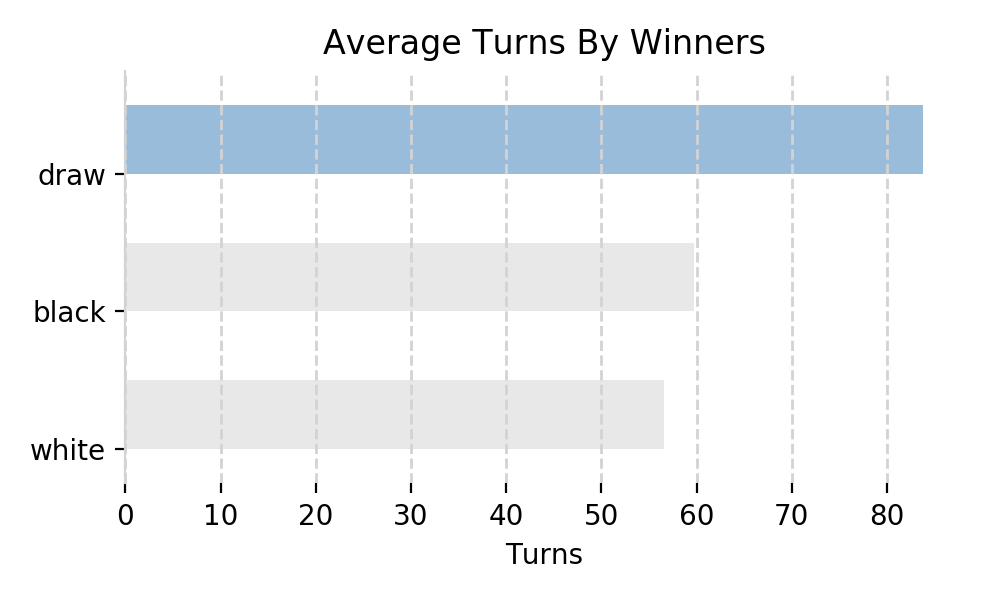

In [79]:
# Create a barh chart based off of the group series from before
plt.figure(figsize=(5,3))

winner_chart = avg_winners.plot(kind='barh',title="Average Turns By Winners", 
                                color=['lightgrey', 'lightgrey', '#327AB7'], alpha=0.5, align="edge")


# Set the xlabel and ylabel
winner_chart.set_xlabel("Turns")
winner_chart.set_ylabel("").set_color('lightgrey')

plt.grid(True, axis="x",  linestyle = "--", color = "lightgrey", linewidth = "1")
# frame invisible
winner_chart.spines['top'].set_visible(False)
winner_chart.spines['right'].set_visible(False)
winner_chart.spines['bottom'].set_visible(False)
winner_chart.spines['left'].set_color('lightgrey')
winner_chart.yaxis.label.set_color('lightgrey')
winner_chart.tick_params(axis='x', colors='black')
winner_chart.tick_params(axis='y', colors='black')
plt.show()
plt.tight_layout()
plt.savefig('Average Turns By Winners.png')

<IPython.core.display.Javascript object>


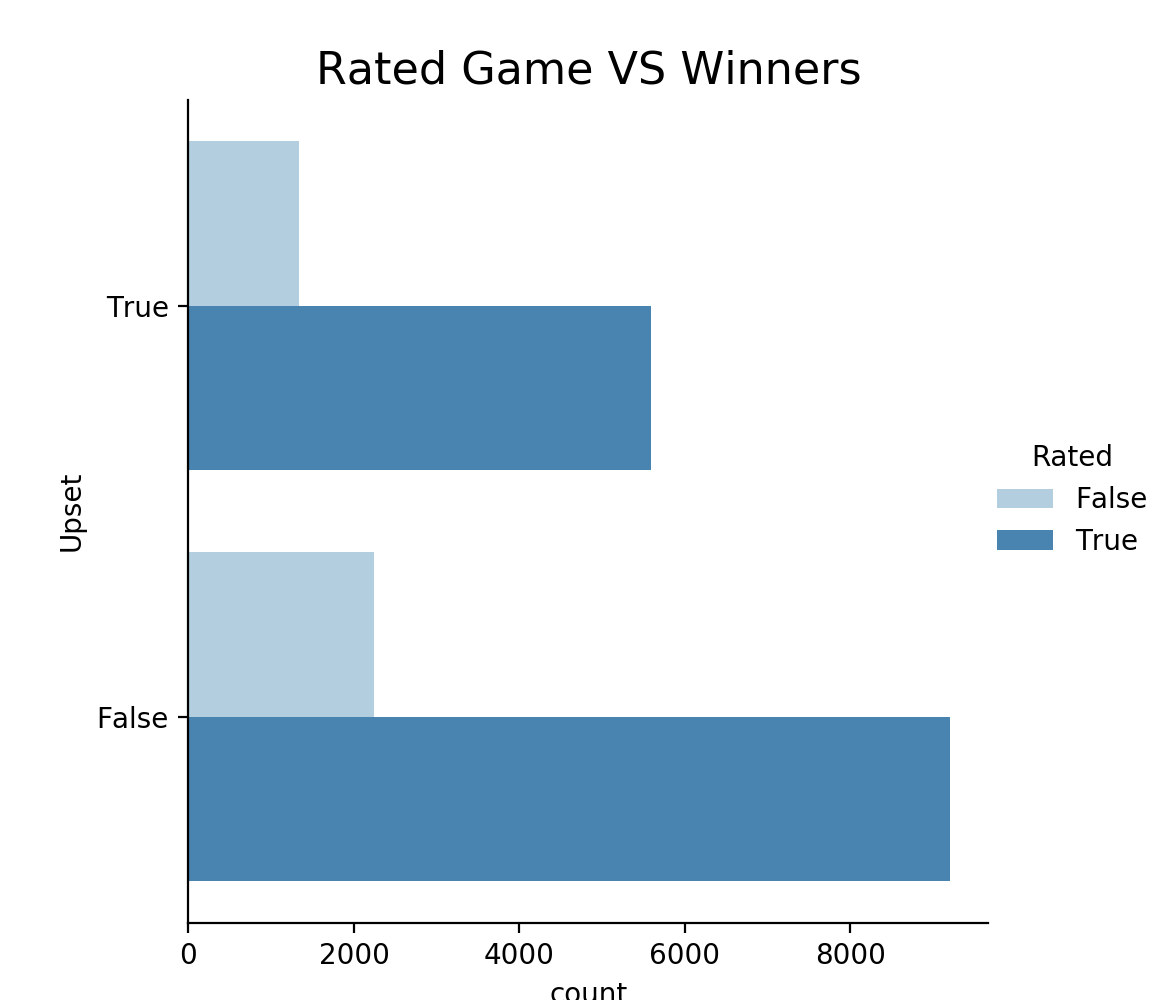

Text(0.5, 1.0, 'Rated Game VS Winners')

In [28]:
sns.catplot(y="Upset", hue="Rated", data=games,
            kind='count',palette = 'Blues')  
plt.subplots_adjust(top=0.9)
plt.title("Rated Game VS Winners",fontsize=16)
plt.savefig('Rated Game VS Winners.png')

<IPython.core.display.Javascript object>


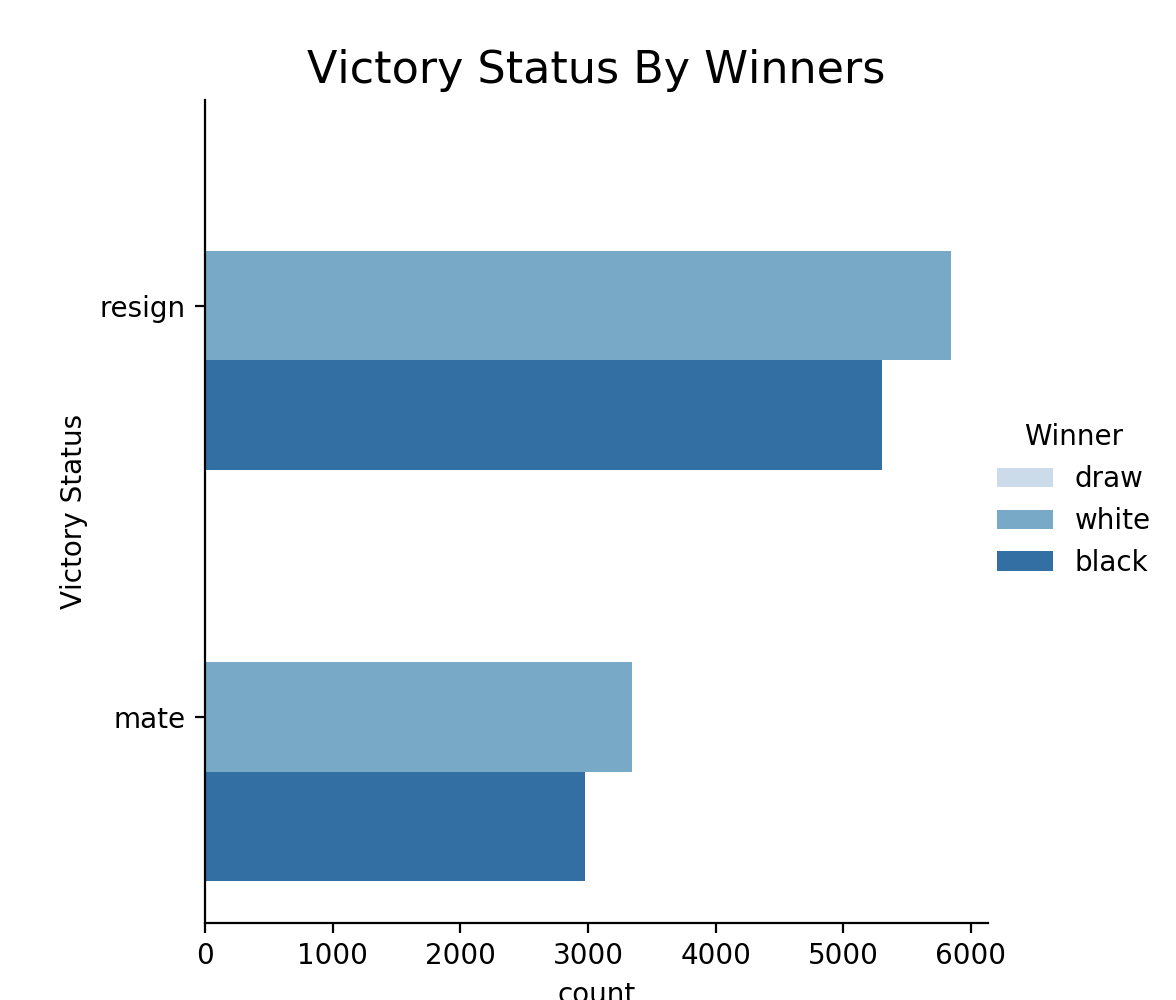

In [81]:
sns.catplot(y="Victory Status", hue="Winner", data=games.sort_values("Victory Status"),
            kind='count',palette = 'Blues', order=['resign', 'mate'] )  
plt.subplots_adjust(top=0.9)
plt.title("Victory Status By Winners",fontsize=16)
plt.savefig('Victory Status By Winners.png')

<IPython.core.display.Javascript object>


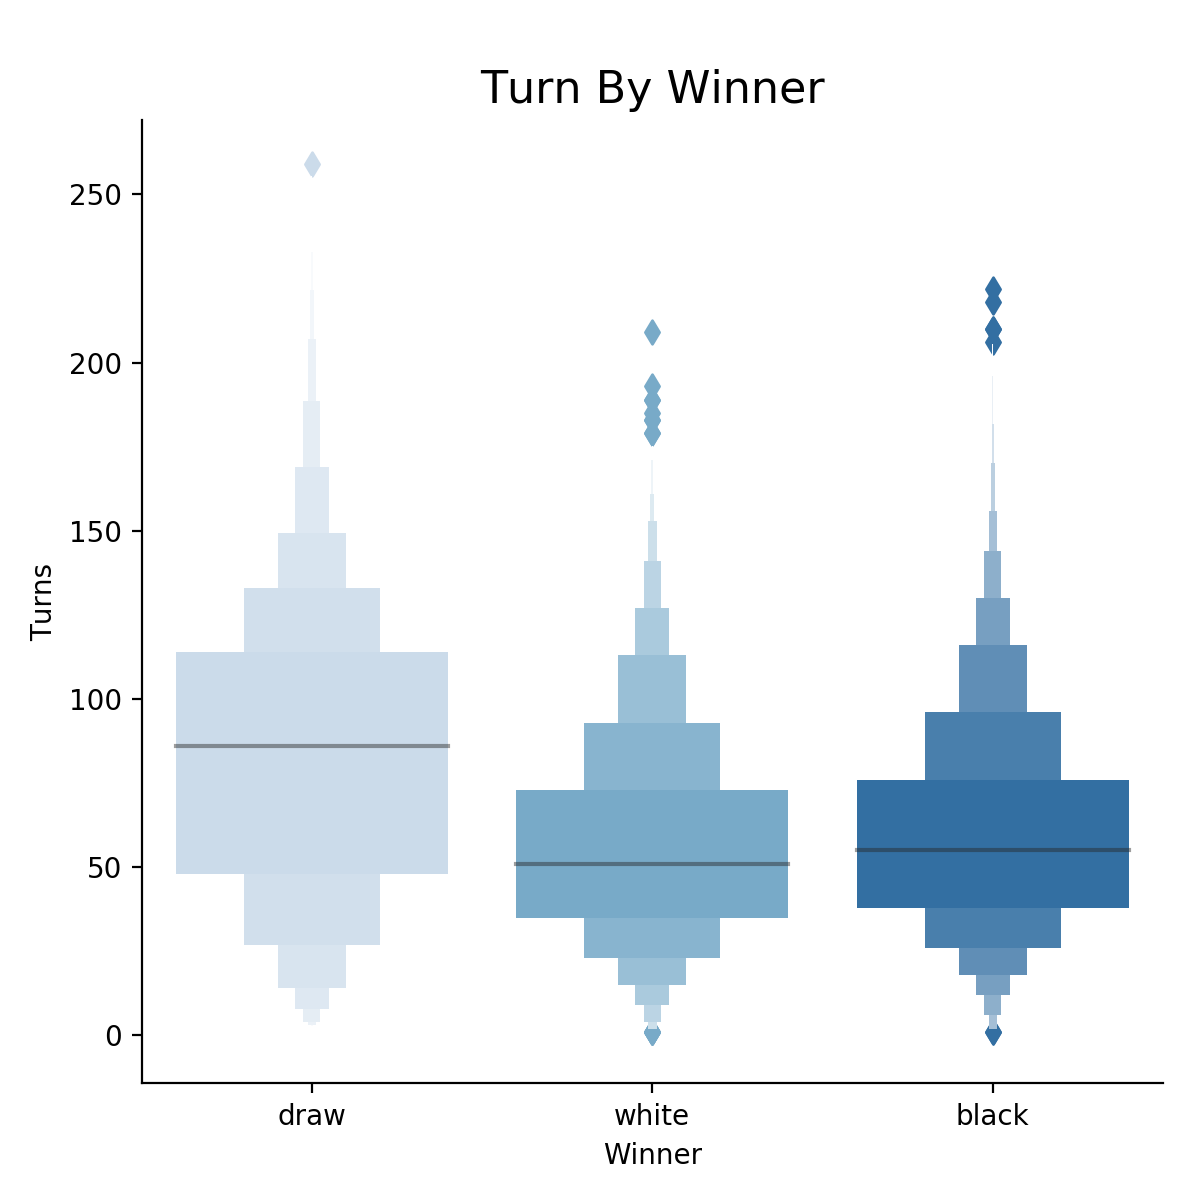

In [82]:
sns.catplot(x='Winner',y='Turns',kind='boxen', palette="Blues", 
           data=games.sort_values("Victory Status"), height=6)
plt.subplots_adjust(top=0.9)
plt.title("Turn By Winner",fontsize=16)
plt.savefig('Turn By Winner.png')

<IPython.core.display.Javascript object>


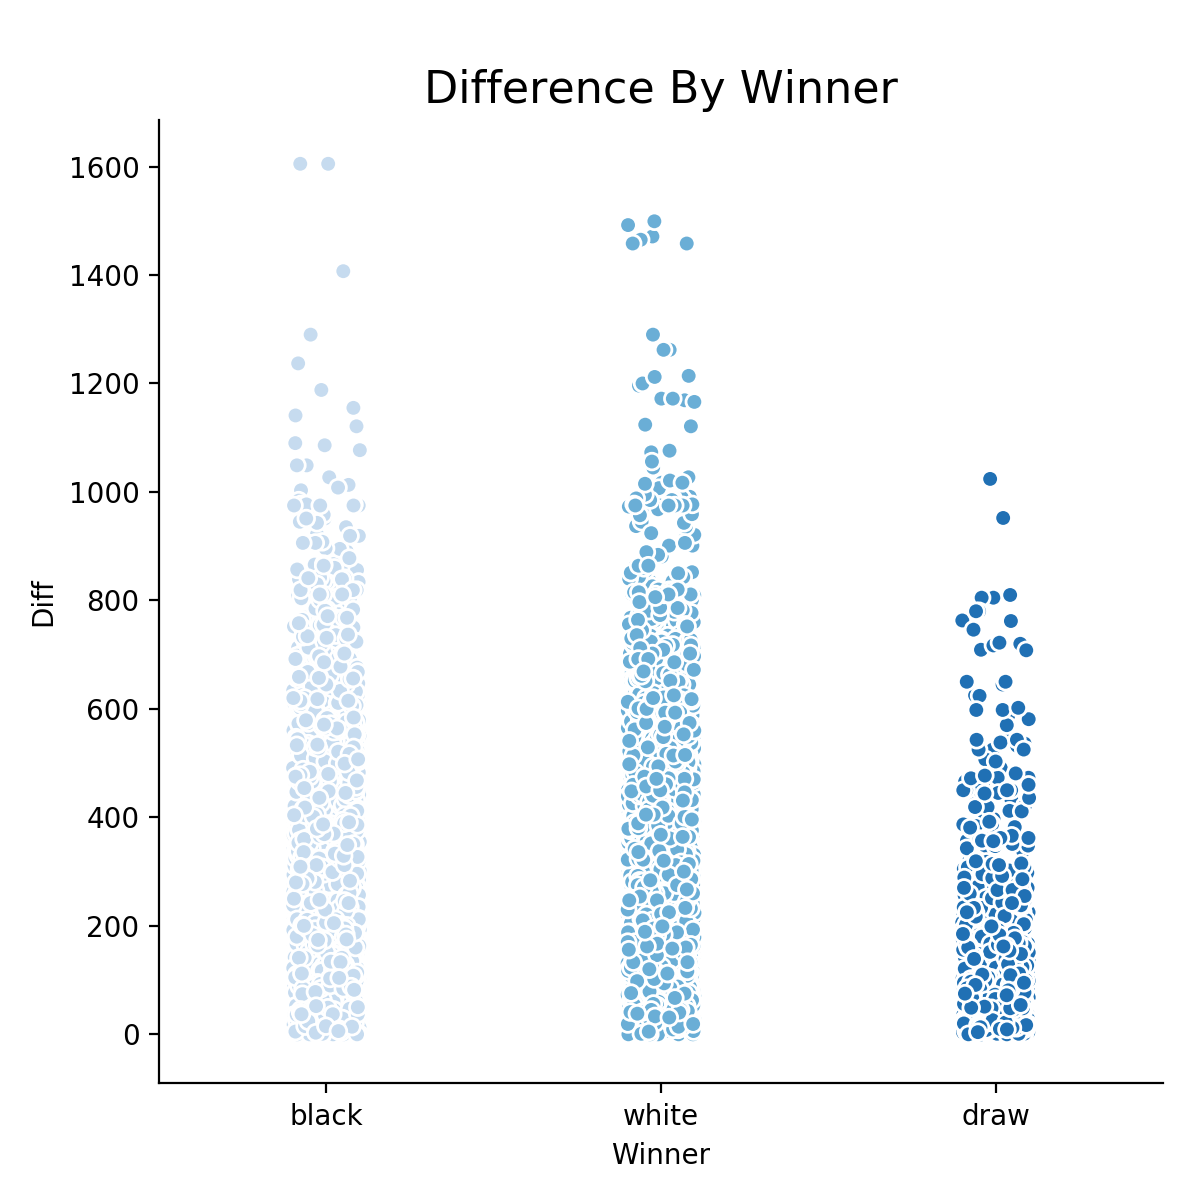

In [83]:
sns.catplot(x="Winner", y="Diff",  
            data=games, jitter = True, height=6, palette="Blues",   
            s = 6, edgecolor = 'w',linewidth=1,marker = 'o')
plt.subplots_adjust(top=0.9)
plt.title("Difference By Winner",fontsize=16)
plt.savefig('Difference By Winner.png')

<IPython.core.display.Javascript object>


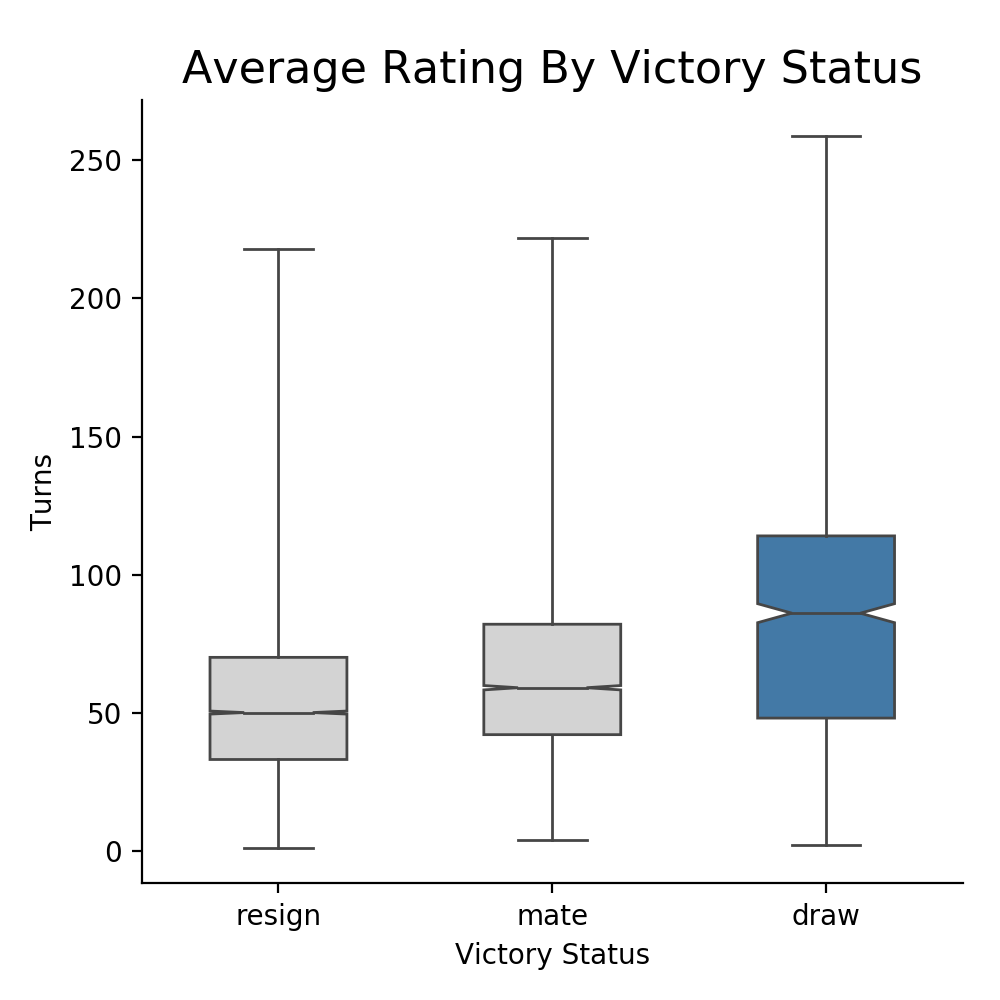

In [84]:
sns.catplot(x='Victory Status', y='Turns', data=games,
            kind='box',linewidth=1,  width=0.5,
            fliersize=18,   palette=['lightgrey', 'lightgrey', '#327AB7'], 
            whis=100,  notch=True  )
plt.subplots_adjust(top=0.9)
plt.title("Average Rating By Victory Status",fontsize=16)
plt.savefig('Average Rating By Victory Status.png')

<IPython.core.display.Javascript object>


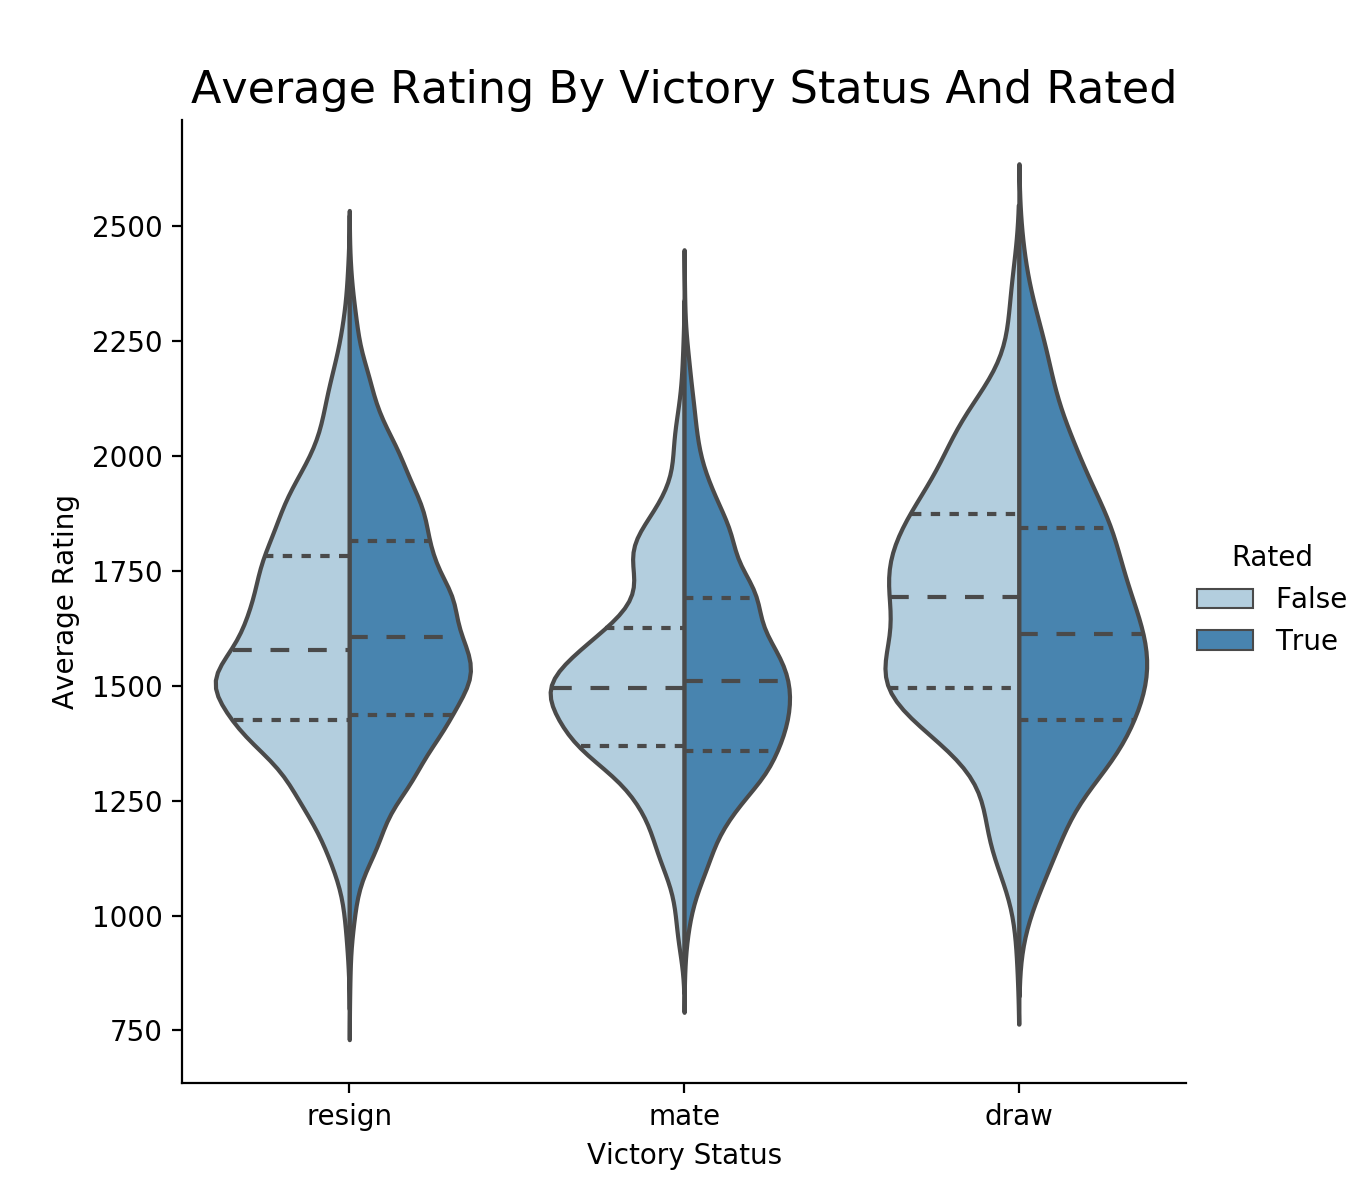

In [85]:
sns.catplot(x="Victory Status", y="Average Rating", data=games,
            kind='violin',hue = 'Rated',palette="Blues", split=True, 
            inner="quartile",height=6)
plt.subplots_adjust(top=0.9)
plt.title("Average Rating By Victory Status And Rated",fontsize=16)
plt.savefig('Average Rating By Victory Status And Rated.png')

<IPython.core.display.Javascript object>


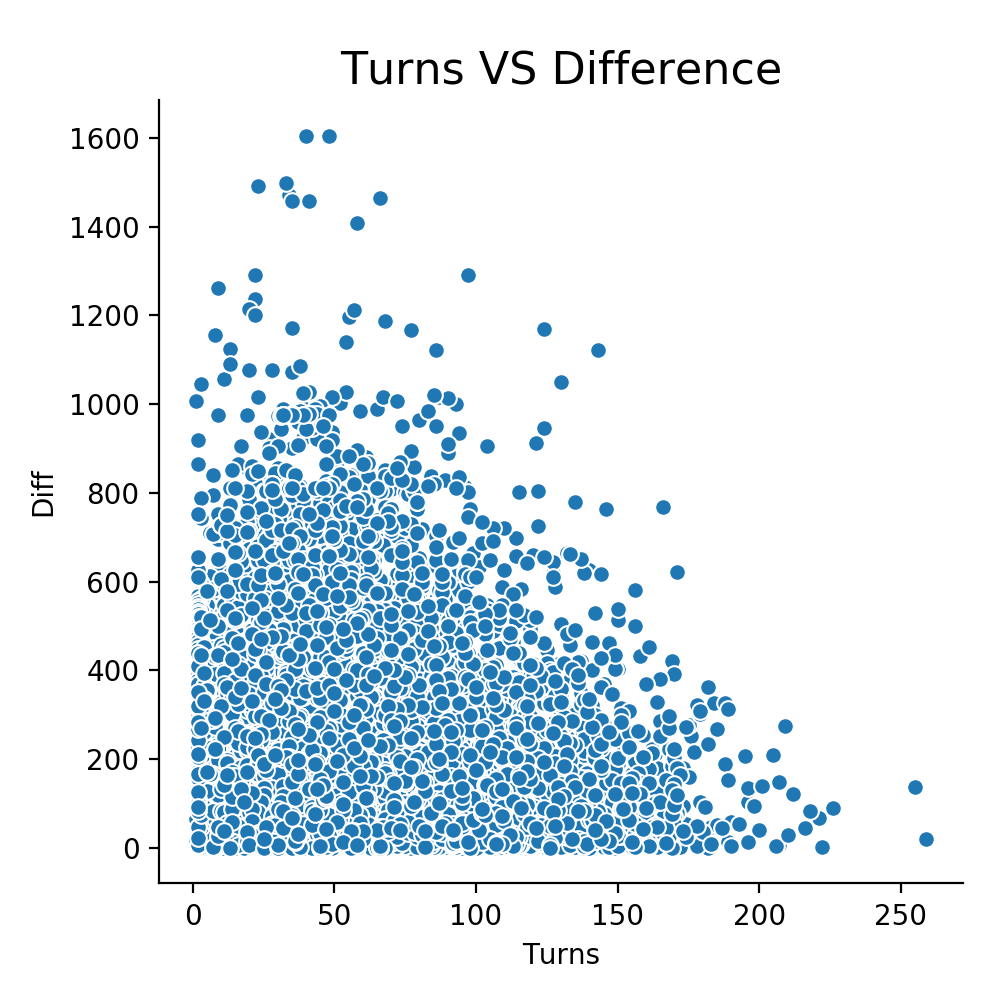

In [86]:
sns.relplot(x='Turns',y='Diff',data=games,
            palette='Blues')
plt.subplots_adjust(top=0.9)
plt.title("Turns VS Difference",fontsize=16)
plt.savefig('Turns VS Difference.png')

<IPython.core.display.Javascript object>


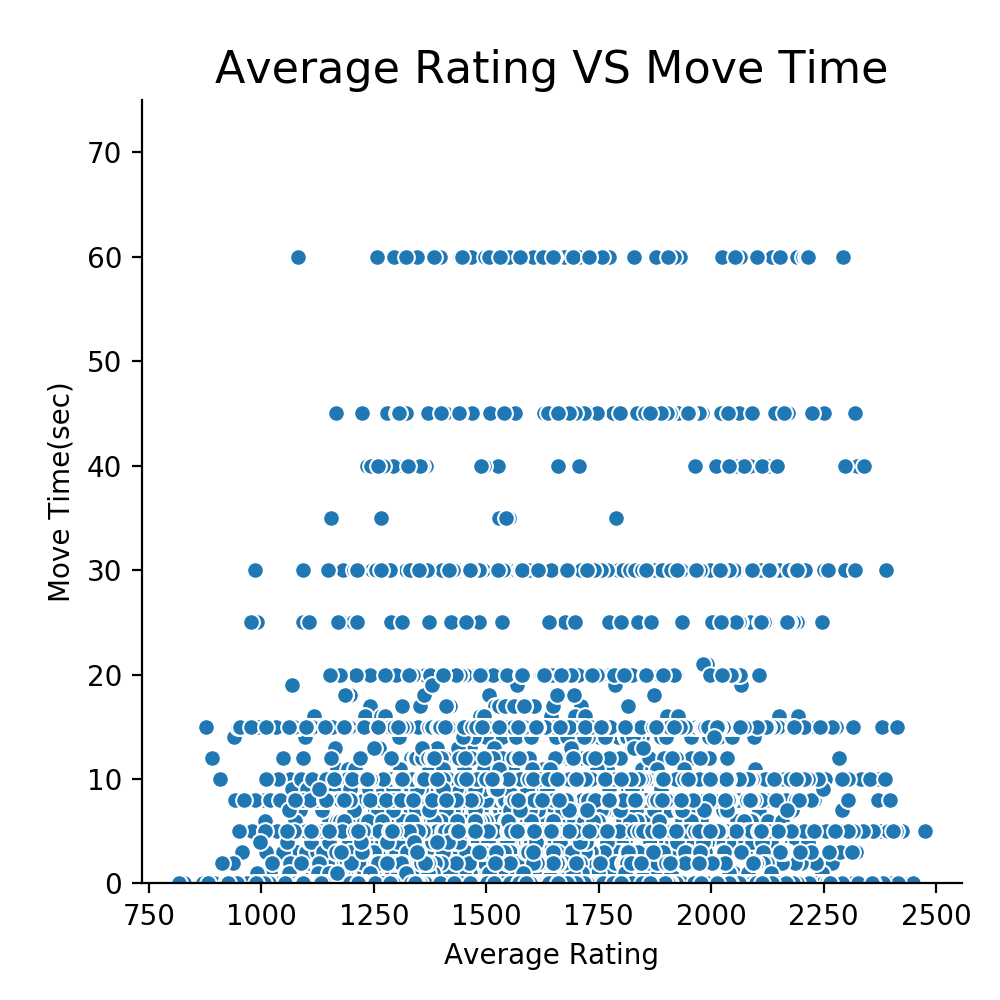

In [87]:
plot = sns.relplot(x='Average Rating',y='Move Time(sec)',data=games,
             palette='Blues')
plot.axes[0,0].set_ylim(0,75) 
plt.subplots_adjust(top=0.9)
plt.title("Average Rating VS Move Time",fontsize=16)
plt.savefig('Average Rating VS Move Time.png')

<IPython.core.display.Javascript object>


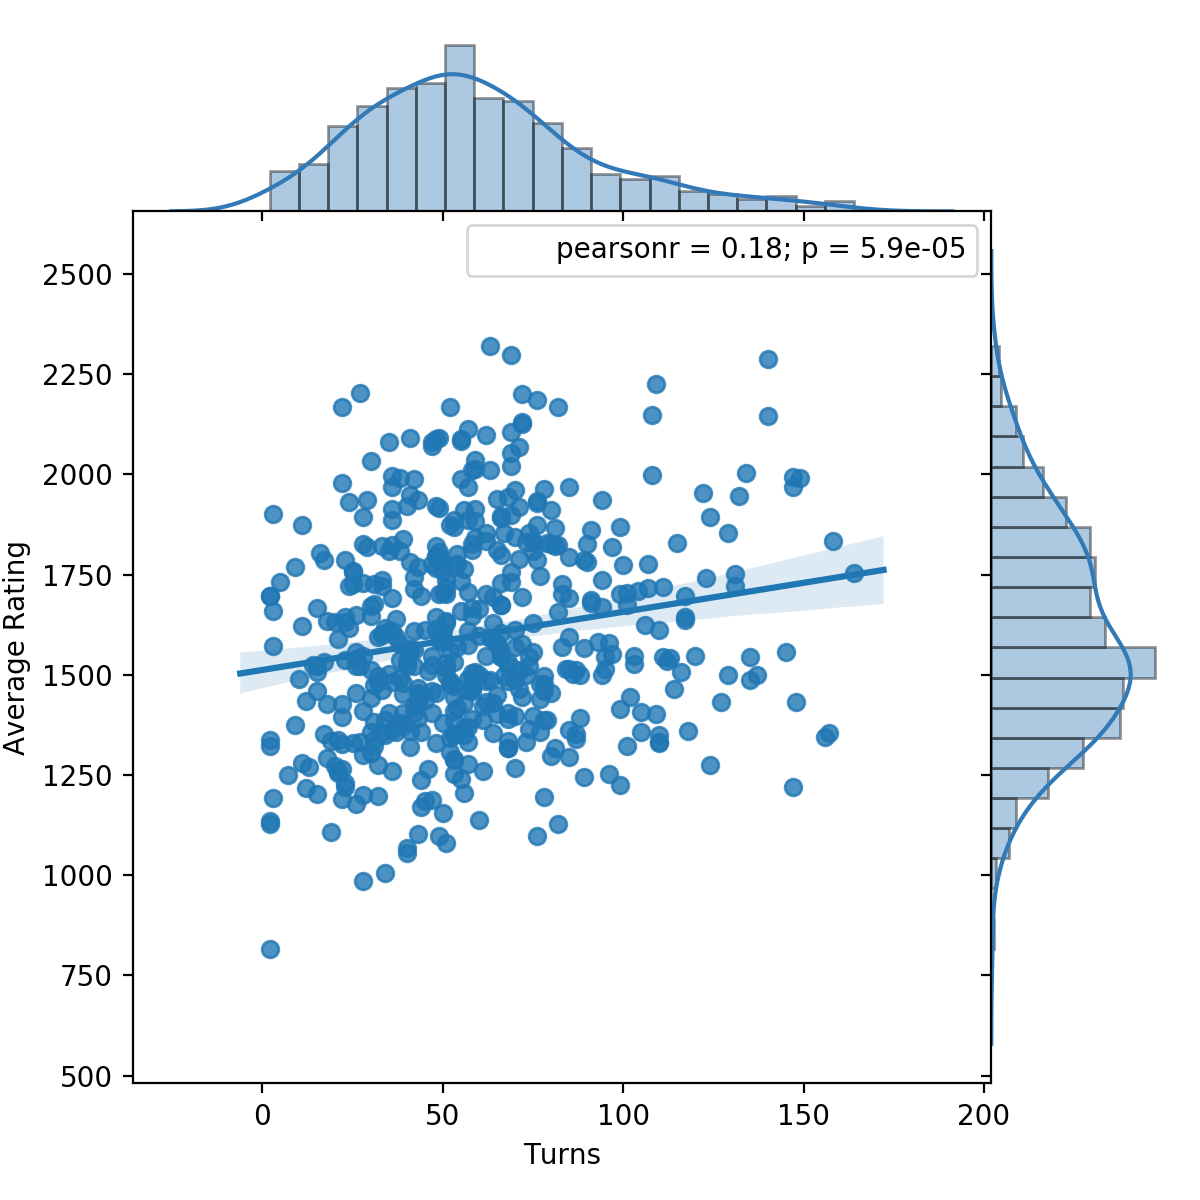

/Users/jingduan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


In [89]:
from scipy import stats
g = sns.JointGrid(x="Turns", y="Average Rating", data=random_games,space=0)
g = g.plot_joint(sns.regplot)    
g.plot_marginals(sns.distplot, color="#327AB7",bins=20,hist_kws={'edgecolor':'k'}) 
g.annotate(stats.pearsonr)
plt.savefig('Average Rating VS Turns.png')

<IPython.core.display.Javascript object>


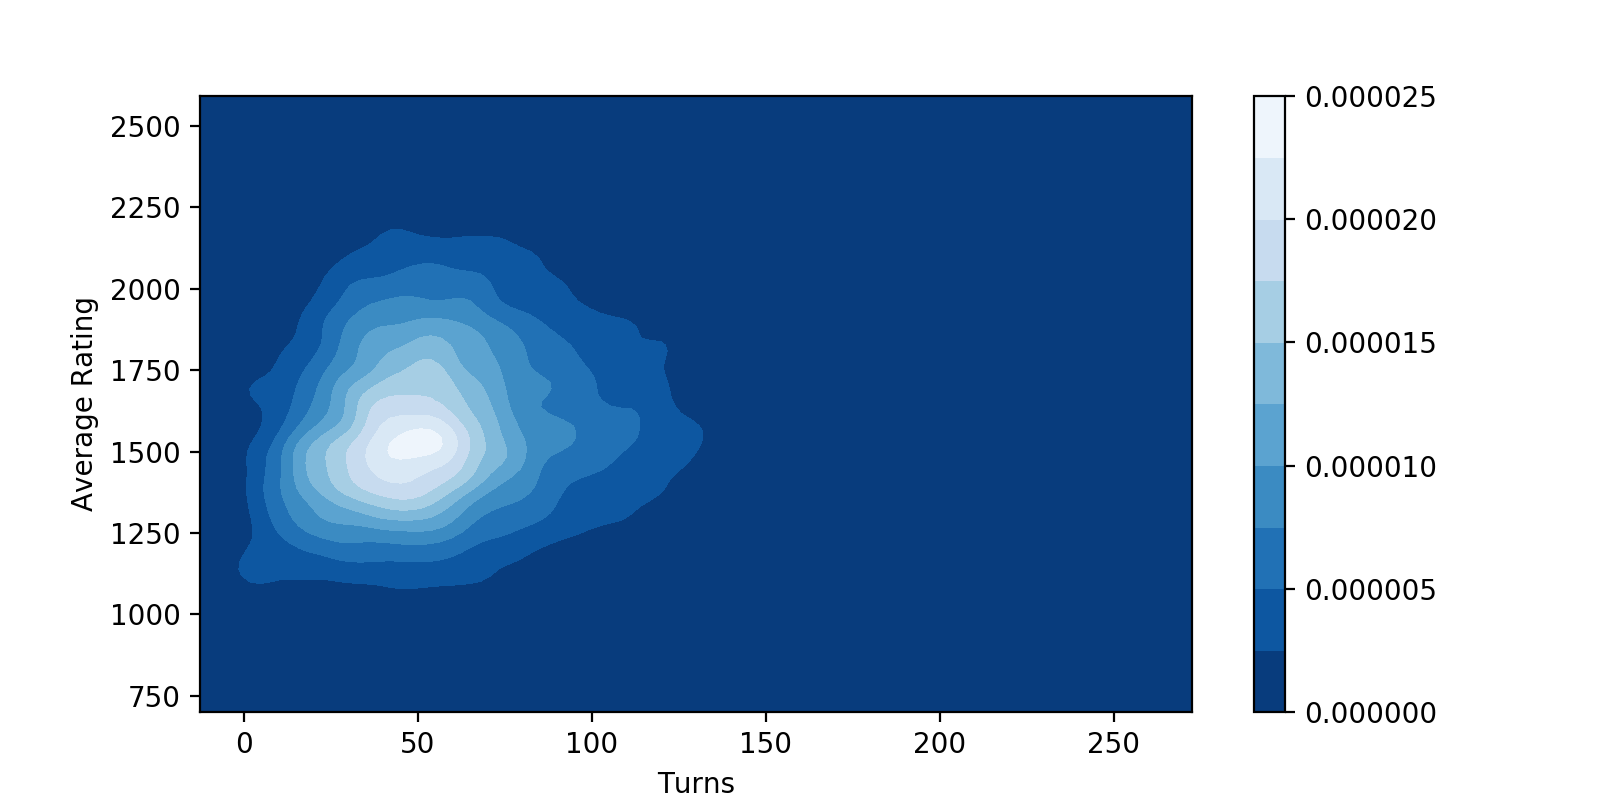

In [90]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(games['Turns'], games['Average Rating'],
           cbar = True, shade = True, cmap = 'Blues_r', shade_lowest=True, n_levels = 10)   
plt.savefig('Average Rating And Turns.png')